# Credit Card Customer Churn Prediction using ANN & Keras 

### Importing Libraries

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Importing Data Set

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv')

In [48]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Removing Extra columns
```python
These columns are not useful for training the deep learning Model
```

In [50]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [51]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df.info()
## Checking dataset have missing values or not 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


##### Checking duplicate 

In [53]:
df.duplicated().sum()
# 0 means no duplicate rows

0

#### Counting no of users fro different region

In [54]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [55]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [56]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [57]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


```python
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
pd.get_dummies Function:

This function is provided by the pandas library and is used to convert categorical variable(s) into dummy/indicator variables. 
This process is also known as one-hot encoding.

drop_first=True:

This parameter is used to avoid multicollinearity by dropping the first level of each categorical variable. When drop_first=True, the first category in each specified column is dropped, and the remaining categories are represented as binary columns (0 or 1). 
This helps in reducing redundancy and ensuring that the resultant dummy variables are linearly independent.
```
**Explanation of Result**
```python
 Geography:
The original Geography column is split into multiple binary columns for each category except the first one (France in this case, which is dropped). Geography_Germany and Geography_Spain columns indicate whether the value was Germany or Spain (1 if true, 0 otherwise).
Gender :
 The original Gender column is split into a binary column for Male (since the first category Female is dropped).
```

In [58]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [59]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Dependent & Independent Features

In [144]:
X = df.drop(columns=['Exited'])      ### Storing all columns except Exited column
y = df['Exited'].values

### Spliting Data in to test & train

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### SCaling thre data  Using Standard Scalaer

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
# pip install tensorflow

### Importing Libraries for Model Craetion

In [166]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

```python
We can crate two type of models :- 
    1. Sequencial
    2. Non Sequencial
 ```   

### Creating Model(Sequencial) Using ANN

In [247]:
model = Sequential()                  # Craeting Object of Model

model.add(Dense(11,activation='sigmoid',input_dim=11))   # Hidden layer 1
model.add(Dense(11,activation='sigmoid'))                # Hidden Layer 2
model.add(Dense(1,activation='sigmoid'))             # Outout Layer

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


```python
model.add(Dense(11,activation='sigmoid',input_dim=11))
11 = no of perceptron 
input_dim = no of input
activation fumction  = sigmoid
```

In [248]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

```python 
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
type of loss function :- loss='binary_crossentropy'
Type of Optimizier :- optimizer='Adam' 
Accuracy :-  metrics=['accuracy']
```

In [249]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

### Model Training 

In [250]:
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3375 - loss: 0.7732 - val_accuracy: 0.7969 - val_loss: 0.5612
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.5403 - val_accuracy: 0.7969 - val_loss: 0.5021
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4949 - val_accuracy: 0.7969 - val_loss: 0.4891
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7819 - loss: 0.5055 - val_accuracy: 0.7969 - val_loss: 0.4807
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7874 - loss: 0.4886 - val_accuracy: 0.7969 - val_loss: 0.4720
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.4645 - val_accuracy: 0.7969 - val_loss: 0.4624
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.4499 - val_accuracy: 0.7969 - val_loss: 0.4532
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4469 - val_accuracy: 0.

### Weights & Bias calculated by model

In [251]:
model.layers[0].get_weights()   # Bias & Weights at 1st Layer

[array([[-1.68361500e-01,  2.02879488e-01, -7.25137740e-02,
         -1.15964614e-01, -2.19344199e-01,  3.88152935e-02,
          3.85442108e-01,  1.46008447e-01,  6.77121654e-02,
         -1.18925467e-01, -9.63087305e-02],
        [ 1.92960143e+00,  3.42074990e-01, -1.76914227e+00,
         -1.84641421e+00,  2.20096064e+00,  7.79082835e-01,
         -2.20806026e+00, -2.02660426e-01,  6.51562691e-01,
          7.98436776e-02,  8.00766766e-01],
        [-3.79820056e-02,  1.88704524e-02,  1.61573812e-01,
          2.14552239e-01, -1.58008281e-02,  9.27573517e-02,
         -3.80076505e-02,  2.05859900e-01,  5.42769507e-02,
          5.37236966e-02,  2.01403633e-01],
        [ 1.41384557e-01, -1.11079848e+00, -4.53996420e-01,
          5.88424541e-02, -2.00361177e-01,  6.74201012e-01,
          2.26885274e-01,  3.21545660e-01,  7.19459578e-02,
         -1.68239206e-01,  6.22981548e-01],
        [ 6.01055443e-01, -1.14366758e+00, -6.30052090e-01,
         -5.39381862e-01,  6.91444576e-01,  

In [252]:
model.layers[1].get_weights()   # Bias & Weights at 2nd Layer

[array([[-1.1618042 , -0.82739276, -0.6120111 ,  0.40988958,  0.30572158,
         -0.65026444,  0.777543  , -0.3250433 ,  0.8158155 ,  0.87560695,
         -0.90956116],
        [ 0.9776341 ,  0.4291848 ,  0.50505483,  0.5691306 , -0.42121238,
          0.9070866 , -0.47409314,  0.04874904, -0.7609272 ,  0.12662417,
          0.20178378],
        [ 0.8105026 ,  0.1970337 ,  0.7740252 ,  0.5133802 , -0.18557276,
          0.429414  , -0.8602395 ,  0.10411629, -0.07672735,  0.29110485,
          0.6972688 ],
        [ 0.87803483,  0.4753228 ,  0.69526553, -0.52301174,  0.19184127,
          0.55206275, -0.15106353,  0.08194095, -0.58120763, -0.439192  ,
          0.759095  ],
        [-0.4588908 , -0.62604123, -0.6608135 ,  0.55831957,  0.90168506,
         -0.794904  ,  0.81648135, -1.1183934 ,  0.40486953,  0.7154423 ,
         -0.5911817 ],
        [ 0.09978318,  0.7591708 ,  0.60529965, -1.4095315 , -0.59505945,
          0.4042101 , -0.6469502 ,  0.919008  , -0.8602239 , -0.6760784

### Testing the Model

In [253]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [254]:
y_pred = np.where(y_log>0.5,1,0)

### Accuracy of the model

In [256]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_pred)
print(Accuracy*100)

86.3


In [261]:
#history.history

### Ploting Loss & Loss value of the Model

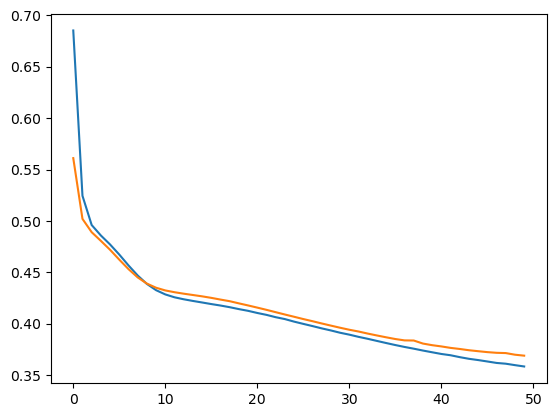

In [262]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Ploting accuracy & val_accuracy

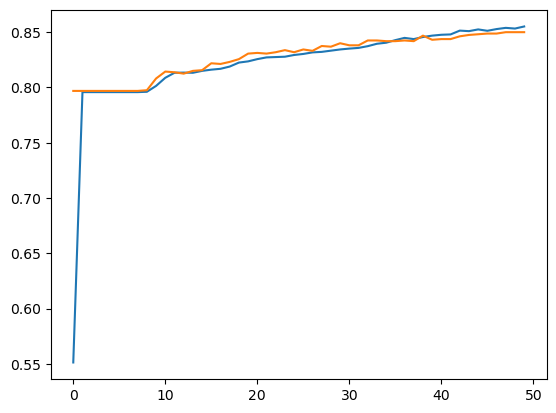

In [264]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])